##Part 1- Time Series Analysis

In [0]:
#Importing the packages
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


As i was not able to use the nsepy package properly, i went on to yahoo finance and downloaded the required dataset myself, hope you can forgive that.

In [0]:
#Importing the dataset
infy = pd.read_csv("gdrive/My Drive/Python Data/INFY.NS .csv", parse_dates=["Date"], index_col="Date")
tcs = pd.read_csv("gdrive/My Drive/Python Data/TCS.NS.csv", parse_dates=["Date"], index_col="Date")

#parse_dates to convert date column to timestamps
#having date as index is a great advantage

In [6]:
infy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,492.237000,495.500000,489.225006,493.600006,381.943909,2002764.0
2015-01-02,493.000000,504.763000,493.000000,503.299988,389.449677,6778320.0
2015-01-05,502.475006,507.500000,494.375000,498.975006,386.103027,9937024.0
2015-01-06,495.000000,496.250000,483.524994,488.549988,378.036255,9667316.0
2015-01-07,491.250000,493.687988,487.500000,490.888000,379.845367,7249916.0


In [14]:
tcs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,1283.500000,1283.500000,1270.500000,1272.780029,1119.813477,366830.0
2015-01-02,1275.500000,1295.469971,1275.300049,1289.719971,1134.717529,925740.0
2015-01-05,1290.500000,1299.949951,1262.319946,1270.119995,1117.473145,1754242.0
2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1076.280396,2423784.0
2015-01-07,1235.000000,1239.569946,1203.719971,1208.849976,1063.566772,2636332.0


In [27]:
type(infy["2015-01"])

pandas.core.frame.DataFrame

Text(0.5,1,'TCS')

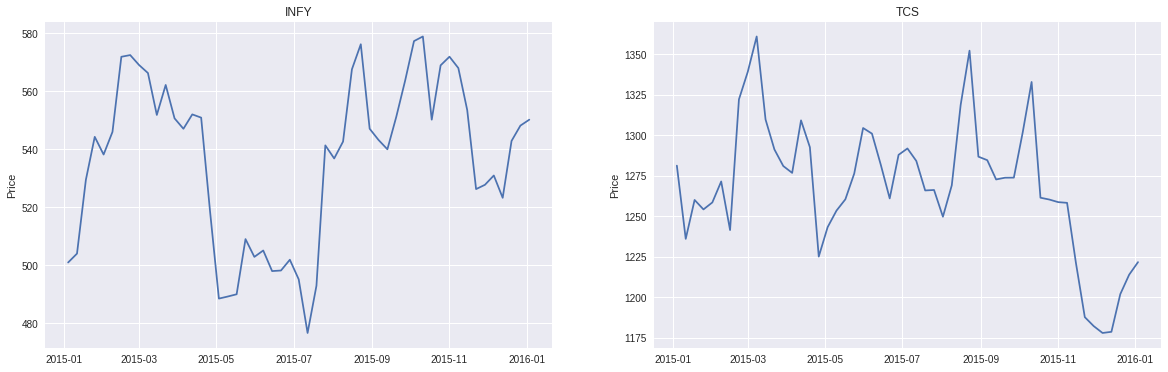

In [64]:
#Resampling data to weekly values.
fig,axes= plt.subplots(nrows=1,ncols=2, figsize=(20,6))


axes[0].plot(infy['Close'].resample('W').mean())
axes[0].set_ylabel('Price')
axes[0].set_title('INFY')

axes[1].plot(tcs['Close'].resample('W').mean())
axes[1].set_ylabel('Price')
axes[1].set_title('TCS')

Text(0.5,1,'TCS')

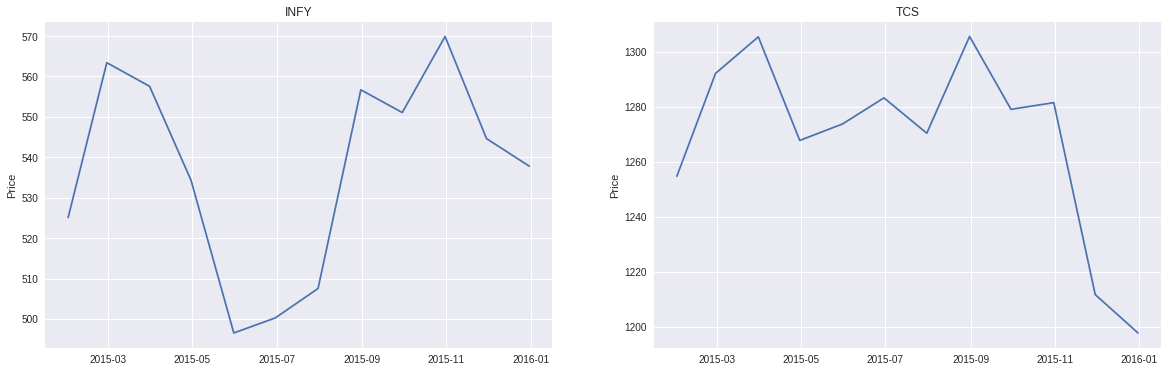

In [63]:
#Resampling to Monthly values.
fig,axes= plt.subplots(nrows=1,ncols=2, figsize=(20,6))


axes[0].plot(infy['Close'].resample('M').mean())
axes[0].set_ylabel('Price')
axes[0].set_title('INFY')

axes[1].plot(tcs['Close'].resample('M').mean())
axes[1].set_ylabel('Price')
axes[1].set_title('TCS')

Text(0.5,1,'TCS')

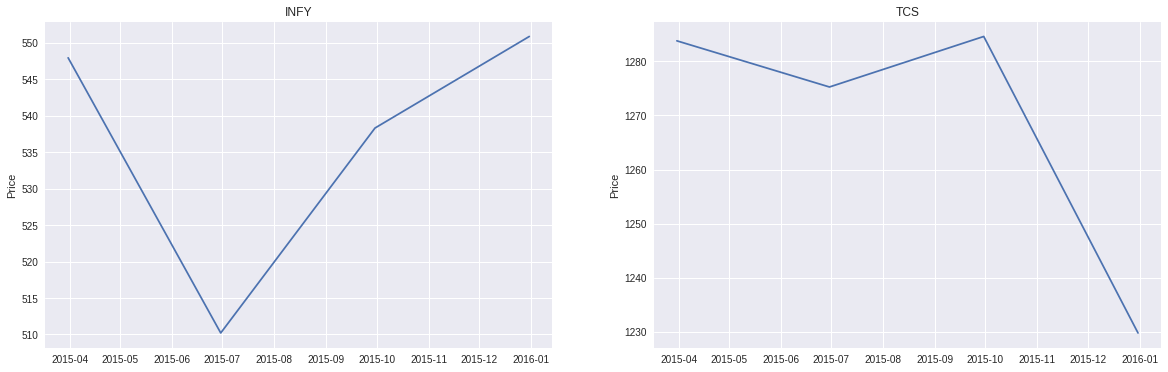

In [65]:
#Resampling INFY to Quarterly values.
fig,axes= plt.subplots(nrows=1,ncols=2, figsize=(20,6))


axes[0].plot(infy['Close'].resample('Q').mean())
axes[0].set_ylabel('Price')
axes[0].set_title('INFY')

axes[1].plot(tcs['Close'].resample('Q').mean())
axes[1].set_ylabel('Price')
axes[1].set_title('TCS')

In [41]:
#Converting close price to a dataframe to calculate the moving average for INFY
infy_close= pd.DataFrame(infy["Close"])

infy_close['MA_10W']= infy_close.Close.rolling(10).mean() #10 rolling window

infy_close['MA_4week']= infy_close.Close.rolling(28).mean() #Monthly rolling window
infy_close['MA_16week']= infy_close.Close.rolling(112).mean() #Quaterly rolling window

infy_close

,Close,MA_10W,MA_4week,MA_16week
Date,,,,
2015-01-01,493.600006,NaN,NaN,NaN
2015-01-02,503.299988,NaN,NaN,NaN
2015-01-05,498.975006,NaN,NaN,NaN
2015-01-06,488.549988,NaN,NaN,NaN
2015-01-07,490.888000,NaN,NaN,NaN
2015-01-08,493.362000,NaN,NaN,NaN
2015-01-09,518.612000,NaN,NaN,NaN
2015-01-12,528.987000,NaN,NaN,NaN
2015-01-13,522.224976,NaN,NaN,NaN


In [38]:
#Converting close price to a dataframe to calculate the moving average for TCS
tcs_close= pd.DataFrame(tcs["Close"])

tcs_close['MA_10W']= tcs_close.Close.rolling(10).mean() #10 rolling window

tcs_close['MA_4week']= tcs_close.Close.rolling(28).mean() #Monthly rolling window
tcs_close['MA_16week']= tcs_close.Close.rolling(112).mean() #Quaterly rolling window

tcs_close

,Close,MA_10W,MA_4week,MA_16week
Date,,,,
2015-01-01,1272.780029,NaN,NaN,NaN
2015-01-02,1289.719971,NaN,NaN,NaN
2015-01-05,1270.119995,NaN,NaN,NaN
2015-01-06,1223.300049,NaN,NaN,NaN
2015-01-07,1208.849976,NaN,NaN,NaN
2015-01-08,1221.900024,NaN,NaN,NaN
2015-01-09,1256.150024,NaN,NaN,NaN
2015-01-12,1254.849976,NaN,NaN,NaN
2015-01-13,1248.949951,NaN,NaN,NaN


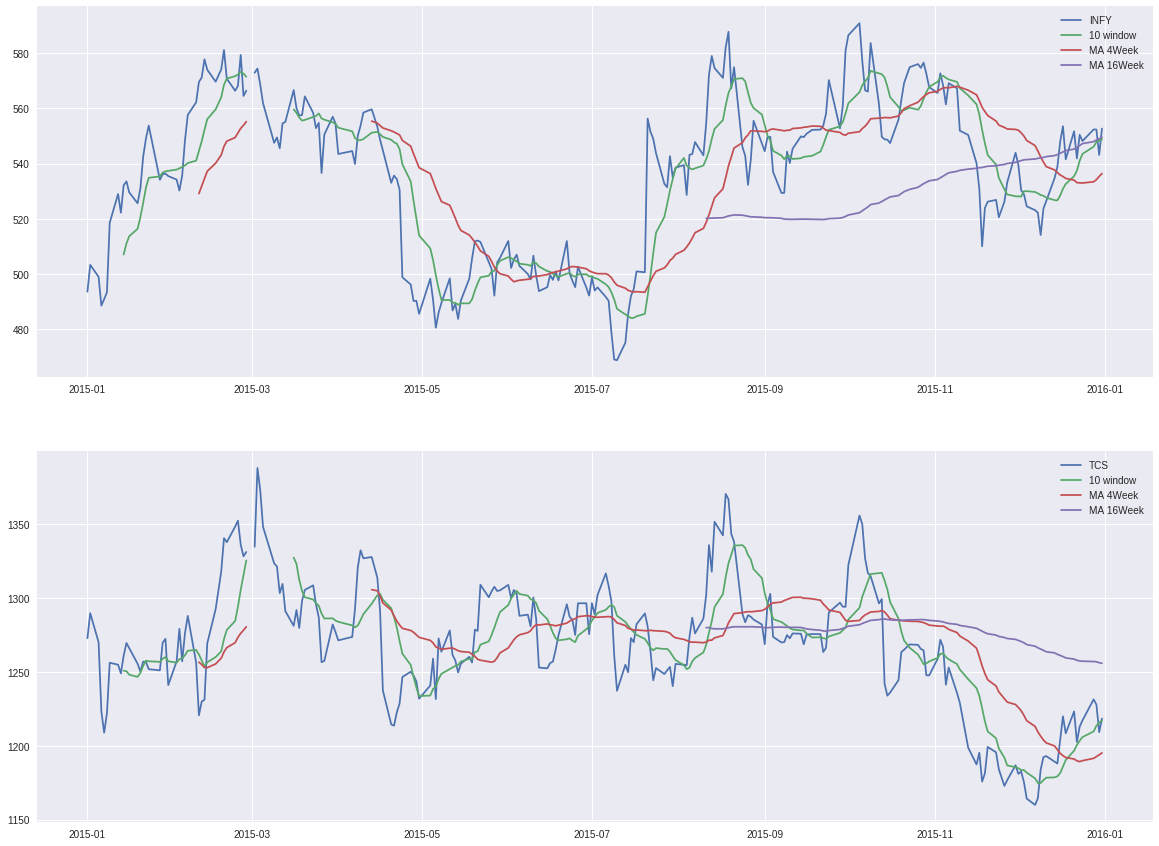

In [54]:
#Plotting the moving averages for INFY and TCS together
fig,axes= plt.subplots(nrows=2,ncols=1, figsize=(20,15))
plt.grid(True)

axes[0].plot(infy_close['Close'],label='INFY')
axes[0].plot(infy_close['MA_10W'], label='10 window')
axes[0].plot(infy_close['MA_4week'], label='MA 4Week')
axes[0].plot(infy_close['MA_16week'], label='MA 16Week')
axes[0].legend()

axes[1].plot(tcs_close['Close'],label='TCS')
axes[1].plot(tcs_close['MA_10W'], label='10 window')
axes[1].plot(tcs_close['MA_4week'], label='MA 4Week')
axes[1].plot(tcs_close['MA_16week'], label='MA 16Week')
axes[1].legend()

In [57]:
#Handle unequal time series due to stock market holidays
infy=infy.asfreq('D',method='pad')
infy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,492.237000,495.500000,489.225006,493.600006,381.943909,2002764.0
2015-01-02,493.000000,504.763000,493.000000,503.299988,389.449677,6778320.0
2015-01-03,493.000000,504.763000,493.000000,503.299988,389.449677,6778320.0
2015-01-04,493.000000,504.763000,493.000000,503.299988,389.449677,6778320.0
2015-01-05,502.475006,507.500000,494.375000,498.975006,386.103027,9937024.0
2015-01-06,495.000000,496.250000,483.524994,488.549988,378.036255,9667316.0
2015-01-07,491.250000,493.687988,487.500000,490.888000,379.845367,7249916.0
2015-01-08,496.399994,499.250000,487.500000,493.362000,381.759705,13564920.0
2015-01-09,495.024994,527.250000,478.263000,518.612000,401.297943,44863328.0


We can build a custom calendar to incorpoarte holidays into the time series.

In [55]:
from pandas.tseries.holiday import AbstractHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

in_cal = CustomBusinessDay(calendar=AbstractHolidayCalendar())

rng = pd.date_range(start="1/1/2015",end="12/31/2015", freq=in_cal)
rng


DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='C')

##Part 2- Visualisation

In [0]:
from bokeh.plotting import figure, output_file, show

In [75]:
output_notebook()
output_file("line.html")

Loading BokehJS ...

In [0]:
fg= figure(x_axis_label='Time', y_axis_label='Stock Price')

In [80]:
#plotting the time series
fg.line(infy_close['Close'], infy_close.index,  line_width=2, color="blue")

# show the results
show(fg)